# What makes a gaming app successful?

Gaming mobile apps are a HUGE part of the market when it comes to the iOS app store. There are aproxamitately ### of games available in the app store. But how many of them are actually successful? Not every game can be as good as Angry Birds, or Candy Crush, or even have an app that cause world peace for one whole month...Pokemon Go. Today, well look into what characteristics would make an app successful.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re

In [2]:
popular_apps= pd.read_csv('popular_apps.csv')

In [3]:
popular_apps.sample(10)

,age_rating,app_name,app_size,copy_right,in_app_purchases,lang,num_reviews,price,review_ratings,seller_name,version
31,4+,Home Design Story,259.5 MB,© 2015 TeamLava LLC,"120 gems,$4.99,20 Gems,$0.99,120 Gems,$3.99",English,2.1K Ratings,\n #90 in Adventure\n ...,4.0,Storm8 Studios,Version 1.0.9
41,12+,Hearthstone,2.7 GB,Infrequent/Mild Profanity or Crude Humor,"Arena Admission,$1.99,Bundle of 7 Classic Pack...","English, French, German, Italian, Japanese, Ko...",9.9K Ratings,\n #34 in Card\n ...,4.3,"Blizzard Entertainment, Inc.",Version 12.0.25770
68,4+,Wordscapes,136 MB,"© Copyright 2017 Peoplefun, Inc.","240 Coins,$0.99,1,340 Coins,$4.99,720 Coins,$2.99",English,98.9K Ratings,\n #3 in Word\n ...,4.9,"PeopleFun, Inc.",Version 1.0.47
52,4+,Angry Birds Star Wars II,219.4 MB,© Rovio Entertainment Oyj,"Tiny Credit Stack,$1.99,Small Credit Stack,$4....",English,33.4K Ratings,\n #196 in Action\n ...,4.6,Rovio Entertainment Oyj,Version 1.9.23
0,9+,Pokémon GO,255.5 MB,Infrequent/Mild Cartoon or Fantasy Violence,"100 PokéCoins,$0.99,550 PokéCoins,$4.99,1,200 ...","English, French, German, Italian, Japanese, Ko...",77.1K Ratings,"\n ,\n ,Fr...",3.9,"Niantic, Inc.",Version 1.81.3
57,4+,Township,255.4 MB,© 2013 Playrix,"Some Cash,$1.99,Bundles of Cash,$4.99,Envelope...","English, Arabic, Dutch, French, German, Indone...",40.9K Ratings,\n #33 in Adventure\n ...,4.6,Playrix Games,Version 5.9.0
151,4+,Charades!™,62.5 MB,© 2018 FatChicken Studios,"Remove Ads,$0.99,500 Coins & Remove Ads,$3.99,...",English,1.6K Ratings,\n #5 in Card\n ...,4.4,FatChicken Studios,Version 2.7.1
147,12+,SongPop,68.6 MB,Infrequent/Mild Mature/Suggestive Themes,"Small Coins Pack,$0.99,Medium Coins Pack,$4.99...","English, Czech, Dutch, French, German, Italian...",2.3K Ratings,\n #28 in Music\n ...,4.3,FreshPlanet Inc.,Version 1.26.27
195,4+,Panda Pop - Bubble Shooter,366.6 MB,© Jam City,"XS coin pack,$0.99,S coin pack,$2.99,L coin pa...","English, Arabic, Danish, French, German, Itali...",360.1K Ratings,\n #26 in Puzzle\n ...,4.6,"Jam City, Inc.",Version 6.9.100
25,4+,Pet Shop Story™,132.9 MB,"© 2016 Storm8 Studios, LLC","24 Gems,$4.99,9 Gems,$1.99,24 Gems,$3.99",English,957 Ratings,\n #144 in Adventure\n ...,4.1,Storm8 Studios,Version 1.1.5


In [4]:
popular_apps.columns
popular

Index(['age_rating', 'app_name', 'app_size', 'copy_right', 'in_app_purchases',
       'lang', 'num_reviews', 'price', 'review_ratings', 'seller_name',
       'version'],
      dtype='object')

In [40]:
def num_lang(x):
    for i in popular_apps['lang']:
        print(len(i.split(', ')))
    

In [60]:
popular_apps.num_reviews = popular_apps.num_reviews.map(lambda x: re.sub(' Ratings', '', x))
popular_apps.num_reviews = (popular_apps.num_reviews.replace(r'[KM]+$', '', regex=True).astype(float) * \
popular_apps.num_reviews.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [65]:
popular_apps.age_rating = popular_apps.age_rating.map(lambda x: re.sub('\+', '', x))

In [94]:
popular_apps.app_size = popular_apps.app_size.replace(r'[GM]B+$', '', regex=True).astype(float)
popular_apps.app_size = popular_apps.app_size.map(lambda x: x*1000 if x < 2 else x)

In [97]:
popular_apps.version = popular_apps.version.map(lambda x: re.sub('Version ', '',x))

In [252]:
highest_reviews = popular_apps[popular_apps.num_reviews == max(popular_apps.num_reviews)]
highest_reviews

,age_rating,app_name,app_size,copy_right,in_app_purchases,lang,num_reviews,price,review_ratings,seller_name,version,num_lang
14,12,Fortnite,144.1,Frequent/Intense Cartoon or Fantasy Violence,"1000 V-Bucks,$9.99,2500 (+300 Bonus) V-Bucks,$...",[English],2200000.0,Adventure,4.6,Epic Games,5.1.1,1


In [108]:
lowest_reviews = popular_apps[popular_apps.num_reviews == min(popular_apps.num_reviews)]
lowest_reviews

,age_rating,app_name,app_size,copy_right,in_app_purchases,lang,num_reviews,price,review_ratings,seller_name,version,num_lang
99,4,Doodle Jump,47.0,"© 2018 Lima Sky, LLC","1000 coins,$0.99,10,000 coins,$4.99,30,000 coi...",English,277.0,\n #24 in Adventure\n ...,4.2,Lima Sky,3.20.2,None


In [140]:
popular_apps.lang = popular_apps.lang.map(lambda x: x.split(','))

AttributeError: 'list' object has no attribute 'split'

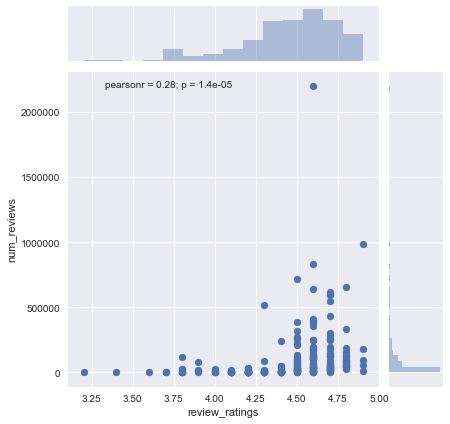

In [128]:
sns.jointplot(popular_apps['review_ratings'], popular_apps['num_reviews'])

In [146]:
popular_apps['num_lang'] = popular_apps.lang.map(lambda x: len(x))

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


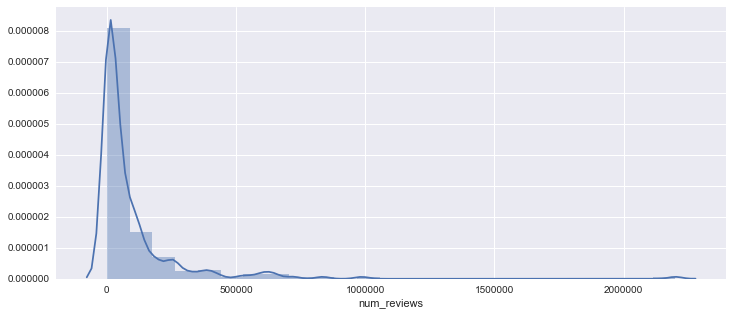

In [260]:
plt.figure(figsize=(12,5))
dist_plot = sns.distplot(popular_apps['num_reviews'], bins= 25)
plt.savefig('dist_plot')

In [129]:
popular_apps['num_reviews'].describe()

count    2.400000e+02
mean     9.896335e+04
std      2.044504e+05
min      2.770000e+02
25%      5.675000e+03
50%      3.005000e+04
75%      1.049750e+05
max      2.200000e+06
Name: num_reviews, dtype: float64

In [262]:
sns.jointplot(popular_apps.review_rating, popular_ratings.num_reviews)

AttributeError: 'DataFrame' object has no attribute 'review_rating'

In [155]:
popular_apps.age_rating = popular_apps.age_rating.astype(int)

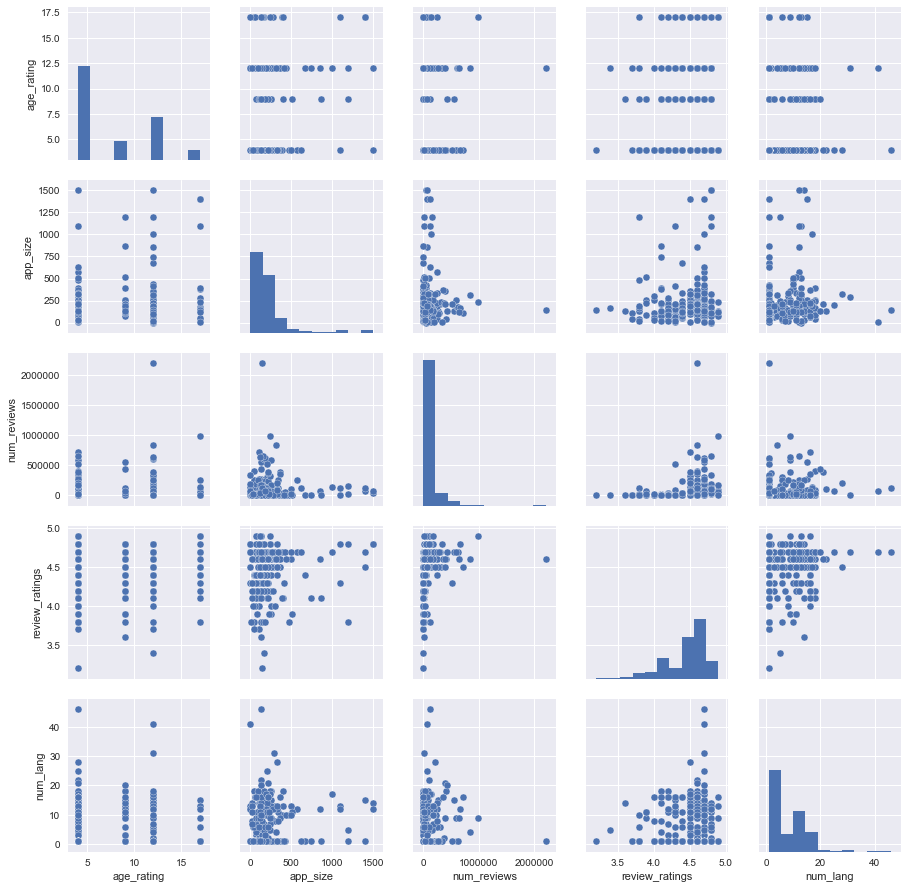

In [157]:
sns.pairplot(popular_apps)

In [250]:
highest_review = popular_apps[popular_apps.review_ratings == popular_apps.review_ratings.max()]
highest_review

,age_rating,app_name,app_size,copy_right,in_app_purchases,lang,num_reviews,price,review_ratings,seller_name,version,num_lang
68,4,Wordscapes,136.0,"© Copyright 2017 Peoplefun, Inc.","240 Coins,$0.99,1,340 Coins,$4.99,720 Coins,$2.99",[English],98900.0,Word,4.9,"PeopleFun, Inc.",1.0.47,1
173,17,Sniper Shooter: Gun Shooting,126.4,Infrequent/Mild Cartoon or Fantasy Violence,"Continue,$0.99,Sniper Shooter VIP,$7.99,Shotgu...",[English],56900.0,Role Playing,4.9,Fun Games For Free,5.0.13,1
215,4,Unblock Me,73.7,"© 2009-2018 Kiragames Co., Ltd.","99 Hints Pack,$0.99,30 Classic Unblock Me Hint...","[English, Filipino, French, German, Indone...",11500.0,Board,4.9,"Kiragames Co., Ltd.",1.6.06,16
221,17,Sniper 3D Assassin: FPS Battle,238.8,Frequent/Intense Realistic Violence,"Premium,$4.99,Pocket of Diamonds,$4.99,Pocket ...","[English, French, German, Italian, Japanes...",986400.0,Action,4.9,Fun Games For Free,2.16.5,9
224,4,Bike Race: Motorcycle Racing,125.7,© Top Free Games,"Bike Race Plus,$7.99,Ghost bike,$7.99,Ninja Bi...","[English, Arabic, French, German, Italian,...",177100.0,Racing,4.9,Top Free Games,7.18.1,13


In [183]:
popular_apps.price.map(re.compile(r'in (.*)\n'))

TypeError: '_sre.SRE_Pattern' object is not callable

In [184]:
def isGoodText(s):
    regex = re.compile('in (.*)\n')
    return re.findall(regex,s)
a= list(map(isGoodText,popular_apps['price']))
a = list(map(lambda L: L[0] if len(L)>0 else L,a))
popular_apps.price = a

In [229]:
pop_df = pd.read_csv('clean_popular_apps.csv', encoding ='iso-8859-1')
pop_df.head()

,Unnamed: 0,age_rating,app_name,app_size,copy_right,in_app_purchases,lang,num_reviews,price,review_ratings,seller_name,version,num_lang
0,0,9,PokÌ©mon GO,255.5,Infrequent/Mild Cartoon or Fantasy Violence,"100 PokÌ©Coins,$0.99,550 PokÌ©Coins,$4.99,1,20...","['English', ' French', ' German', ' Italian', ...",77100,NaN,3.9,"Niantic, Inc.",1.81.3,9
1,1,4,Solitaireåá,44.2,å© 2017 Zynga Inc,NaN,"['English', ' Danish', ' Dutch', ' Finnish', '...",410300,Card,4.6,Zynga Inc.,4.5.9,18
2,2,4,Angry Birds 2,575.2,å© Rovio Entertainment Corporation,"Pile of gems,$0.99,Precious pouch of gems,$4.9...","['English', ' French', ' German', ' Italian', ...",250600,Puzzle,4.7,Rovio Entertainment Oyj,2.21.1,12
3,3,4,PAC-MAN,103.9,å©2017 BANDAI NAMCO Entertainment Inc.,"MAZE: PAC-MAN CLASSIC,$4.99,Spoon of Tokens,$1...","['English', ' French', ' German', ' Italian', ...",5700,Family,4.3,BANDAI NAMCO Entertainment America Inc.,6.6.3,10
4,4,4,Candy Crush Soda Saga,182.7,å© King.com Limited 2014-2018. All rights rese...,"XS Gold Bar package,$0.99,Hard Currency XS,$0....","['English', ' Chinese', ' Japanese', ' Korean'...",34100,Puzzle,4.5,King,1.118.4,6


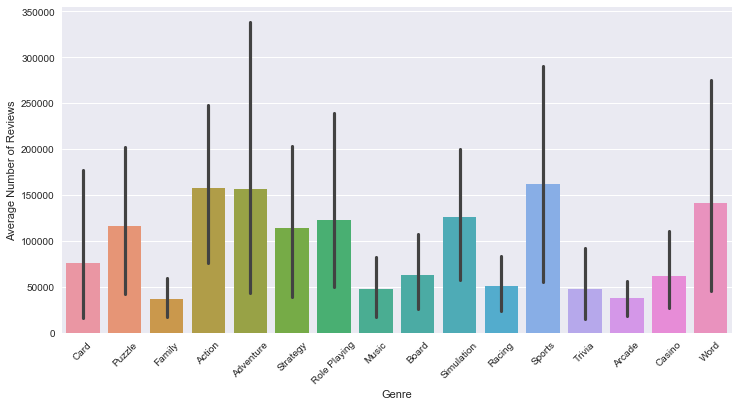

In [282]:
plt.figure(figsize=(12,6))
genre_nreview = sns.barplot(x = pop_df.price,y=pop_df.num_reviews)
loc, labels = plt.xticks()
genre_nreview.set_xticklabels(labels, rotation=45)
genre_nreview.set(xlabel='Genre', ylabel='Average Number of Reviews')
plt.savefig('Genre x AvgNumRev.jpeg')

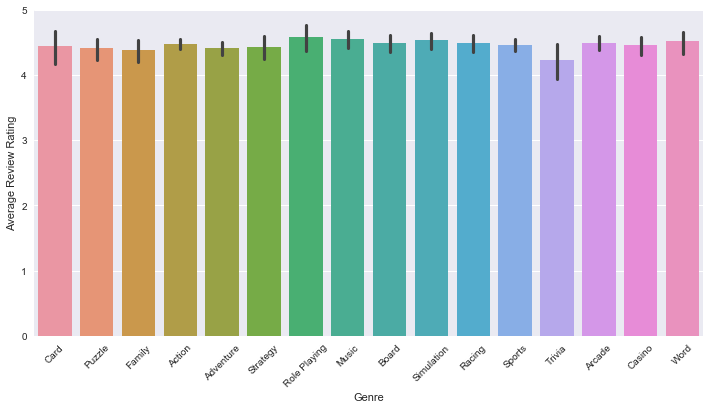

In [283]:
plt.figure(figsize=(12,6))
genre_review = sns.barplot(x = pop_df.price,y=pop_df.review_ratings)
loc, labels = plt.xticks()
genre_review.set_xticklabels(labels, rotation=45)
genre_review.set(xlabel='Genre', ylabel='Average Review Rating')
plt.savefig('Genre x AvgRevRat.jpeg')

In [256]:
len(pop_df)

240

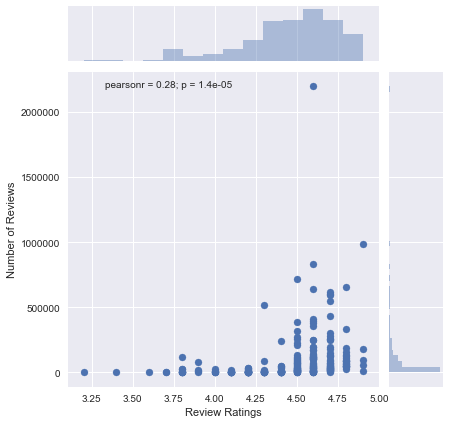

In [274]:
plt.figure(figsize=(8, 8))
review_joint = sns.jointplot(pop_df.review_ratings, pop_df.num_reviews)
loc, labels = plt.xticks()
review_joint.set_axis_labels('Review Ratings','Number of Reviews')
plt.savefig('review_jointplot.png')

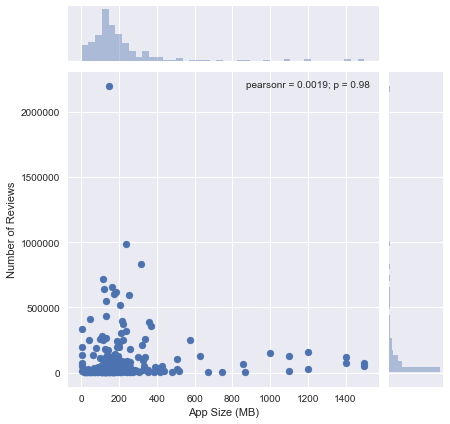

In [280]:
app_reviews = sns.jointplot(pop_df.app_size, pop_df.num_reviews)
app_reviews.set_axis_labels('App Size (MB)','Number of Reviews')
plt.savefig('appsize_reviews.png')

In [288]:
pop_df.num_reviews.mean()

98963.35416666667

In [290]:
pop_df.review_ratings.mean()

4.452083333333335